<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/ch6/SVD_of_digital_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 이번 실습에서는 Image에 대한 SVD의 예를 간단히 살펴 봅니다. Digital image는 각각의 pixel의 색을 나타내는 숫자들로 이루어진 matrix로 볼 수 있습니다. 영상데이터를 저장하고 전송함에 있어 데이터의 크기는 비용과 직결되는 굉장히 중요한 문제입니다. 우리는 문제가 되지 않는 선에서 데이터의 크기를 줄이고자 하고, 이러한 과정을 압축이라고 부릅니다. 압축과 관련하여 SVD가 어떤 식으로 활용이 될 수 있는지 살펴봅니다. (실제 영상압축에서는 SVD뿐만 아니라 다양한 접근방법이 존재합니다.)

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

## eigenvalue decomposition, sigunlar value decomposition
- numpy package를 이용해 matrix로부터 eigenvalue, eigenvector를 구하고, eigenvalue decomposition을 이해하자.
- numpy package를 이용해 matrix로부터 singular value, sigular vector를 구하고, singular value decomposition을 이해하자.

In [2]:
A = np.array([[0.6,0.2],[0.4,0.8]])

L,S = np.linalg.eig(A)

print('A=\n',A)
print('eigenvalue:\n',L)
print('eigenvectors:\n',S)

print(np.inner(S[:,0],S[:,0]))
print(np.inner(S[:,1],S[:,1]))
print(np.inner(S[:,0],S[:,1]))

A=
 [[0.6 0.2]
 [0.4 0.8]]
eigenvalue:
 [0.4 1. ]
eigenvectors:
 [[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]
1.0
0.9999999999999999
-0.3162277660168379


In [3]:
A = np.array([[0.6,0.2],[0.2,0.8]]) # symmetric matirx
L,S = np.linalg.eig(A)

print('A=\n',A)
print('eigenvalue:\n',L)
print('eigenvectors:\n',S)

print(np.inner(S[:,0],S[:,0]))
print(np.inner(S[:,1],S[:,1]))
print(np.inner(S[:,0],S[:,1])) # orthonormal 

A=
 [[0.6 0.2]
 [0.2 0.8]]
eigenvalue:
 [0.4763932 0.9236068]
eigenvectors:
 [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]
0.9999999999999998
0.9999999999999998
0.0


In [4]:
d = L[0]*np.outer(S[:,0],S[:,0]) + L[1]*np.outer(S[:,1],S[:,1]) # eigenvalue decomposition (spectral theorem)
print("l1*(s1 s1') + l2*(s2 s2')=\n",d)

l1*(s1 s1') + l2*(s2 s2')=
 [[0.6 0.2]
 [0.2 0.8]]


In [5]:
L[0]*np.outer(S[:,0],S[:,0]) 

array([[ 0.34472136, -0.21304952],
       [-0.21304952,  0.13167184]])

In [6]:
L[1]*np.outer(S[:,1],S[:,1]) 

array([[0.25527864, 0.41304952],
       [0.41304952, 0.66832816]])

In [7]:
A = np.array([[2,2],[1,-1]])
U,sig,V = np.linalg.svd(A)
print("A=\n",A)
print("singular vector matrix U = \n",U)
print("singular values=\n",sig) 
print("singular value matrix =\n",np.diag(sig))
print("singular vector matrix V = \n",V)

A=
 [[ 2  2]
 [ 1 -1]]
singular vector matrix U = 
 [[-1.00000000e+00 -1.11022302e-16]
 [-1.11022302e-16  1.00000000e+00]]
singular values=
 [2.82842712 1.41421356]
singular value matrix =
 [[2.82842712 0.        ]
 [0.         1.41421356]]
singular vector matrix V = 
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [8]:
# A = U SIG V'
print(U@np.diag(sig)@(V))

[[ 2.  2.]
 [ 1. -1.]]


In [9]:
sig[0]*np.outer(U[0,:],V[0,:])

array([[2.00000000e+00, 2.00000000e+00],
       [2.22044605e-16, 2.22044605e-16]])

In [10]:
sig[1]*np.outer(U[1,:],V[1,:]) 

array([[-1.11022302e-16,  1.11022302e-16],
       [ 1.00000000e+00, -1.00000000e+00]])

In [11]:
sig[0]*np.outer(U[0,:],V[0,:]) + sig[1]*np.outer(U[1,:],V[1,:]) # singular value decomposition

array([[ 2.,  2.],
       [ 1., -1.]])

## SVD of digital image

- 실습을 위해 인터넷에서 흑백영상을 하나 가져오도록 합니다. 칼라영상인 경우에는 여러 개의 채널을 가지므로, 각각의 채널에 대한 추가적인 연산이 필요합니다. I.shape을 통하여 영상을 표현하는 matrix의 크기를 확인해 봅시다.

In [12]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/First_medical_X-ray_by_Wilhelm_R%C3%B6ntgen_of_his_wife_Anna_Bertha_Ludwig%27s_hand_-_18951222.gif/220px-First_medical_X-ray_by_Wilhelm_R%C3%B6ntgen_of_his_wife_Anna_Bertha_Ludwig%27s_hand_-_18951222.gif'
I = io.imread(img)
I = np.array(I)
I.shape
# 322 rows, 220 columns

(322, 220)

- 다음과 같은 코드를 실행하여 영상이 제대로 matrix로 저장이 되었는지 확인해 볼 수 있습니다.

uint8


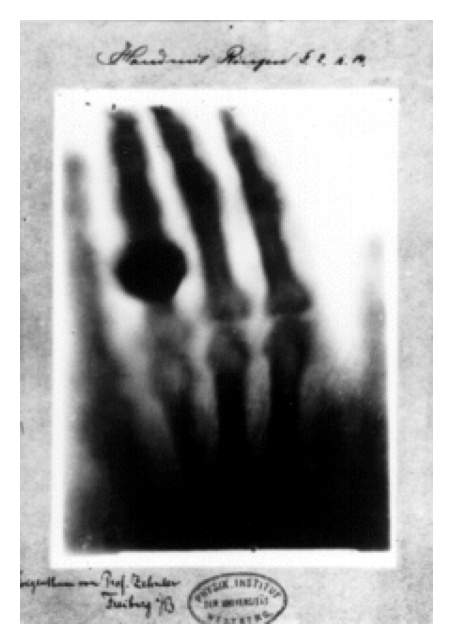

In [13]:
print(I.dtype)
plt.figure(dpi=200)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.show()

- SVD는 np.linalg.svd를 통해 행해질 수 있습니다. svd는 U, sig, V를 반환합니다.

In [14]:
U,sig,V = np.linalg.svd(I)

- 반환된 matrix들의 shape를 확인해 봅시다. sigular value로 구성되는 sig는 diagonal matrix이기 때문에 대각성분만을 vector로 반환하였습니다.

In [15]:
print(U.shape)
print(sig.shape)
print(V.shape)

(322, 322)
(220,)
(220, 220)


- U 또는 V의 vector들(singular vector)의 length가 1인지 확인해 봅시다. 정확히 1이 되지는 못해도 거의 1에 가까움을 확인할 수 있을 것입니다.

In [16]:
print(np.linalg.norm(V[:,1]))

0.9999999999999996


- sigular value는 크기 순으로 정렬되어 있습니다. 앞에서부터 10번째까지의 singular value들과 뒤에서부터 10번째까지의 singular value들을 각각 출력해봅니다. 
- np.diag를 이용하여 singular value들을 diagonal matrix로 구성할 수 있습니다.

In [17]:
print(sig[:10])
print(sig[-10:])
Sig = np.diag(sig)
print(Sig.shape)

[43082.8179708  11684.34315656  6877.5966997   6070.37566829
  4485.55407712  3498.75735131  1776.2995502   1631.56046947
  1441.89573073  1258.27292893]
[13.51335504 13.07671129 12.95960088 11.96617818 11.89467024 11.65086356
 10.60090647  9.9952003   9.4905102   8.46064314]
(220, 220)


- Singular value값을 y축을 log scale로 하여 관찰해 봅니다. 

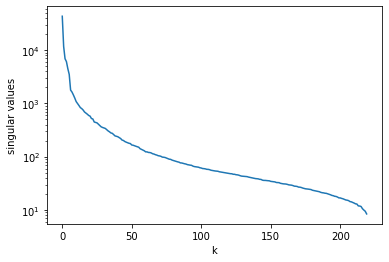

In [18]:
plt.semilogy(sig)
plt.xlabel('k')
plt.ylabel('singular values')
plt.show()

- 40번째 까지의 singluar value들을 linear scale로 하여 관찰해 봅니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


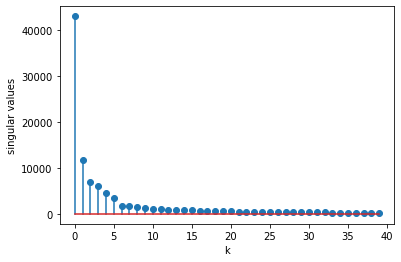

In [19]:
plt.stem(sig[:40])
plt.xlabel('k')
plt.ylabel('singular values')
plt.show()

- 특정 singular value에 해당하는 성분만을 가져와서 matrix를 구성하고, 이를 통해 나타나는 영상을 확인해보겠습니다.

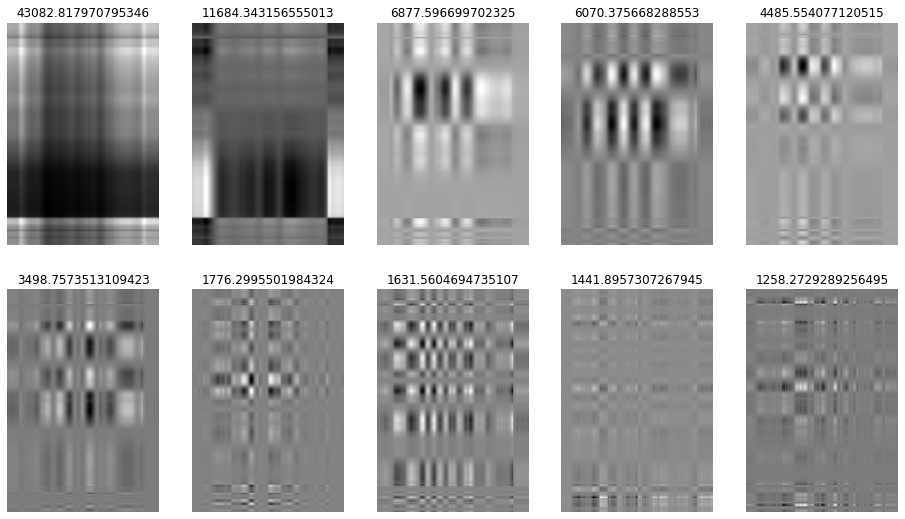

In [20]:
plt.figure(figsize=(16,9))
for n in range(10):
  Uc = U[:,n]
  sigc = sig[n]
  Vc = V[n,:]

  plt.subplot(2,5,n+1)
  plt.imshow(sigc*np.outer(Uc,Vc),cmap='gray')
  plt.axis('off')
  plt.title(sig[n])
plt.show()

- 10번째 성분까지 사용하여 영상을 만들어 보겠습니다.

(322, 10)
(10,)
(10, 220)


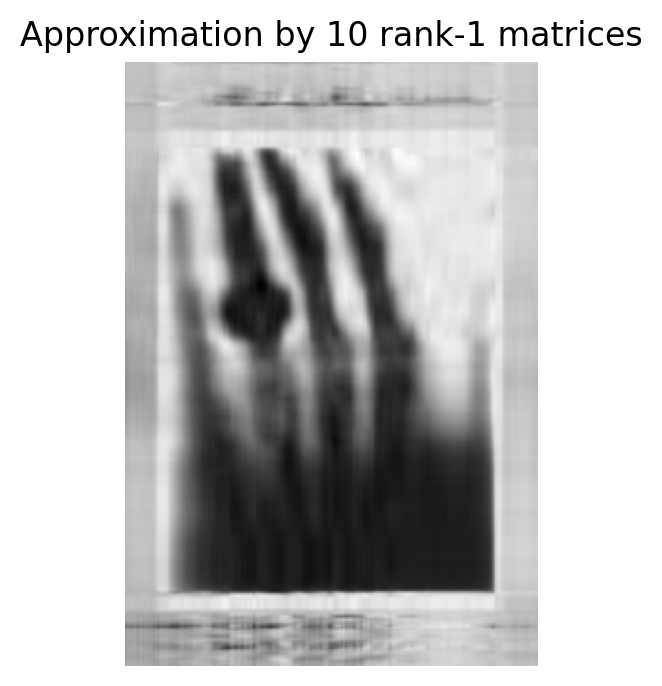

In [24]:
n=10
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.title(f'Approximation by {n} rank-1 matrices')
plt.show()

- n을 점점 키우면서 영상을 확인하여 어느 정도 n이면 원본과 충분히 비슷한지, 그리고 그 때의 데이터를 표현하기 위해 사용된 숫자의 개수를 원본 matrix의 숫자의 개수와 비교해 봅시다.

(322, 30)
(30,)
(30, 220)


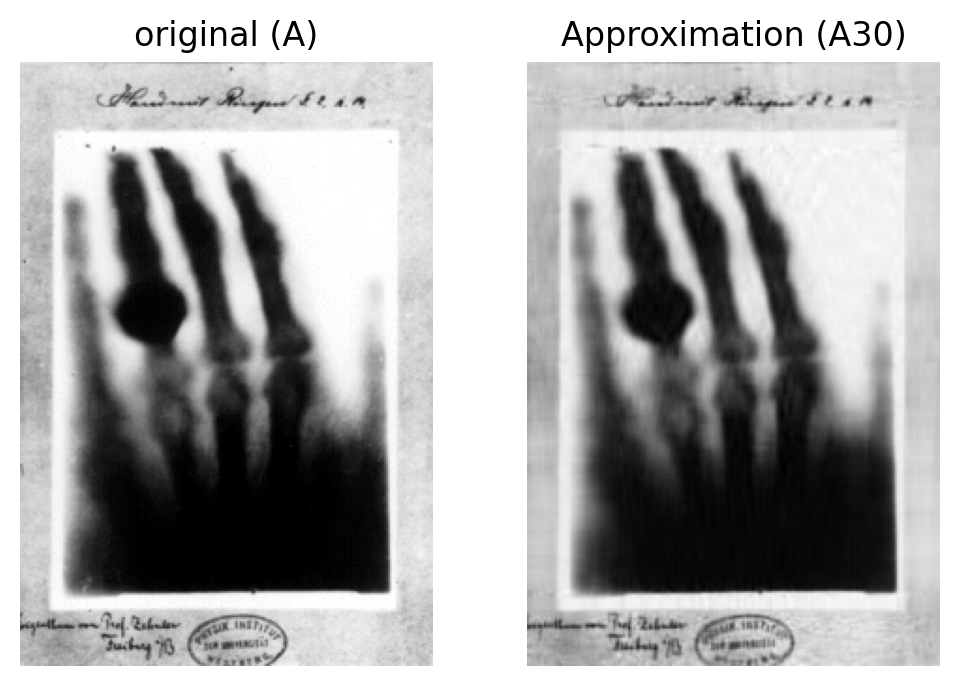

In [22]:
n=30
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('original (A)')
plt.subplot(122)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.title(f'Approximation (A{n})')
plt.show()

(322, 100)
(100,)
(100, 220)


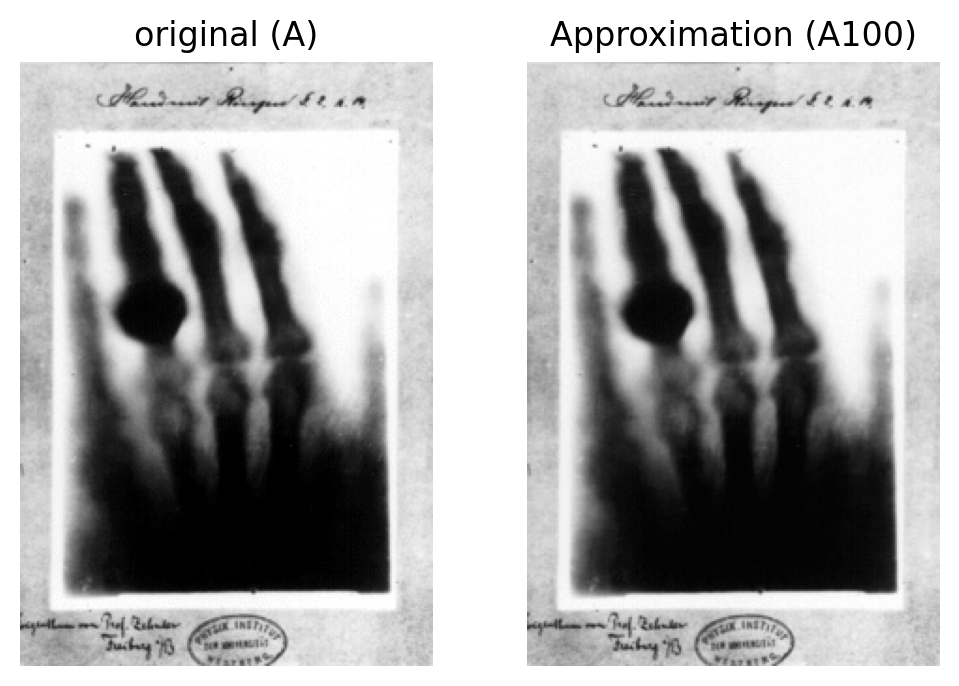

In [23]:
n=100
Uc = U[:,:n]
sigc = sig[:n]
Vc = V[:n,:]
print(Uc.shape)
print(sigc.shape)
print(Vc.shape)
plt.figure(dpi=200)
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.title('original (A)')
plt.subplot(122)
plt.imshow(np.matmul(Uc,np.matmul(np.diag(sigc),Vc)),cmap='gray')
plt.axis('off')
plt.title(f'Approximation (A{n})')
plt.show()